## Multiple Linear Regression


In [1]:
# load the data set from sklearn datasets
# from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
california_housing = fetch_california_housing()

In [ ]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california_housing.target_names

['MedHouseVal']

In [ ]:
california_housing.data.shape

(20640, 8)

In [ ]:
# describe the data set 
california_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [ ]:
california_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [ ]:
california_housing_data=pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_housing_data["Price"]=california_housing.target

In [ ]:
data=california_housing_data
data.to_csv("california_housing.csv",index=False)

In [2]:
california_housing_data=pd.read_csv("./california_housing.csv")

Text(0.5, 1.0, 'Correlation Heatmap of California Housing Data')

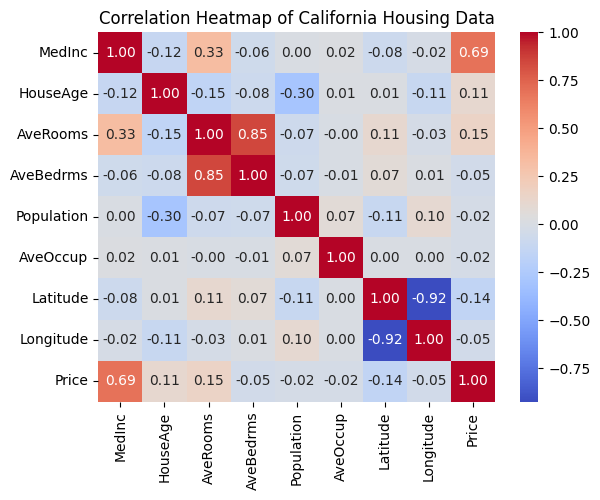

In [3]:
# check the corelation between the features and the target variable
sns.heatmap(california_housing_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of California Housing Data")

In [4]:
X_train=california_housing_data.iloc[:, :-1]
X_train
Y_train=california_housing_data.iloc[:, -1]


In [5]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
Y_train

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [ ]:
X_train_scale

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]], shape=(14448, 8))

In [8]:
X_test_scale

array([[-1.15209909, -0.30267793, -0.48206459, ...,  0.60588341,
         0.22100564,  0.26245997],
       [-0.70179147,  0.09672999, -0.14607585, ..., -0.1827281 ,
        -0.20974655,  0.0379687 ],
       [-0.19920134,  1.85412486, -0.56735074, ..., -1.051554  ,
         1.03568912, -1.44866235],
       ...,
       [-0.18230355, -1.02161219, -0.65256612, ..., -0.3870047 ,
        -0.89801363,  0.8112164 ],
       [-0.10920338, -1.5009017 ,  0.03743213, ...,  0.38864246,
         1.0450533 , -0.86997375],
       [-0.42597077, -0.94173061, -0.81378442, ..., -0.22539751,
        -0.67327336,  0.64658947]], shape=(6192, 8))

In [9]:
# train the model train data set
from sklearn.linear_model import LinearRegression

In [10]:
regression=LinearRegression()
model=regression.fit(X_train_scale, Y_train)

In [13]:
Y_predict_val=model.predict(X_test_scale)

In [12]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: Price, Length: 6192, dtype: float64

In [14]:
#performace metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error, root_mean_squared_error
mse=mean_squared_error(Y_test, Y_predict_val)
mae=mean_absolute_error(Y_test, Y_predict_val)
rmse=np.sqrt(mse)

In [15]:
print(mse,mae,rmse)

0.5165967398485735 0.5238759626552131 0.7187466451042213
